# `nb02a`: Tables

![](figures/nb02/numpy.png)

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. 

To use Numpy, we first need to import the `numpy` package:

In [1]:
import numpy as np

# Arrays

A Numpy `array` is a table of values, all of the same type, and is indexed by a tuple of  integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

In [2]:
a = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12]])
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [3]:
a.dtype

dtype('int64')

In [4]:
a.itemsize

8

In [5]:
a.ndim

2

In [6]:
a.shape

(3, 4)

## Array creation

In [7]:
# from a list
a = np.array([2, 3, 4])
a

array([2, 3, 4])

In [8]:
b = np.array([1.2, 3.5, 5.1])
b

array([1.2, 3.5, 5.1])

In [9]:
b.dtype

dtype('float64')

In [10]:
# from a list, with a specified dtype
c = np.array([[1, 2], [3, 4]], dtype=float)
c

array([[1., 2.],
       [3., 4.]])

In [11]:
c.dtype

dtype('float64')

In [12]:
# with placeholders
a = np.zeros((3, 4), dtype=int)
a

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [13]:
b = np.ones((3, 4, 2), dtype=int)
b

array([[[1, 1],
        [1, 1],
        [1, 1],
        [1, 1]],

       [[1, 1],
        [1, 1],
        [1, 1],
        [1, 1]],

       [[1, 1],
        [1, 1],
        [1, 1],
        [1, 1]]])

In [14]:
c = np.empty((2, 3))
c

array([[1.24230865e-316, 0.00000000e+000, 6.91837348e-310],
       [1.24729758e-316, 4.66229513e+232, 6.91837226e-310]])

In [15]:
# with a range
d = np.arange(10, 30, 5)  # same as d = np.array(range(10, 30, 5))
d

array([10, 15, 20, 25])

In [16]:
d = np.linspace(10, 30, num=10)
d

array([10.        , 12.22222222, 14.44444444, 16.66666667, 18.88888889,
       21.11111111, 23.33333333, 25.55555556, 27.77777778, 30.        ])

In [17]:
# with random numbers
e = np.random.random((3, 3))
e

array([[0.5064597 , 0.15951658, 0.51287209],
       [0.18140466, 0.29256508, 0.18587288],
       [0.28267477, 0.07039511, 0.01569684]])

## Shape manipulation

The shape of an array can be changed with various functions.

In [18]:
a = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12]])
a.shape

(3, 4)

In [19]:
# flatten
a.ravel()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [20]:
# modify the shape
a.reshape(6, 2)

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12]])

In [21]:
# transpose
a.T

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

<div class="alert alert-success">
    
**Exercise**. Build the following 2d array (without typing it in explicitly):
```
[[1,  6, 11],
 [2,  7, 12],
 [3,  8, 13],
 [4,  9, 14],
 [5, 10, 15]]
```

</div>

## Internals

In [22]:
a = np.arange(1, 10).reshape(3, 3)
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [23]:
a.strides

(24, 8)

In [24]:
b = a
b = b.reshape((-1,))
b

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [25]:
b.shape

(9,)

In [26]:
b.strides

(8,)

In [27]:
b[0] = -1
b

array([-1,  2,  3,  4,  5,  6,  7,  8,  9])

In [28]:
a

array([[-1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9]])

What's going on? The `reshape` operation does not create a new array, but only a different _view_ of `a`. Therefore, `a` and `b` share the same contiguous data block in memory.

<img src="./figures/nb02/ndarray.png" width="75%" />

In [29]:
b.base is a.base

True

In [30]:
a.__array_interface__["data"][0]

25554752

In [31]:
b.__array_interface__["data"][0]

25554752

In [32]:
c = a.copy()
c.__array_interface__["data"][0]

24672320

# Basic operations

In Numpy, basic operations are called [universal functions](https://numpy.org/doc/stable/reference/ufuncs.html#available-ufuncs) (`ufunc`). They all operate on arrays in an element-by-element fashion. More specifically, a ufunc is a vectorized wrapper for a function that takes a fixed number of specific inputs and produces a fixed number of specific outputs. 

In [33]:
# np.add?

As an example, basic mathematical operations are implemented as ufuncs. They operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [34]:
x = np.array([[1, 2], [3 ,4]], dtype=float)
y = np.array([[5, 6], [7, 8]], dtype=float)

# Elementwise sum
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [35]:
# Elementwise difference
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [36]:
# Elementwise product
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [37]:
# Elementwise division
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


Numpy also provides functions which are designed to operate on sequences of numbers, such as the `sum` function. Sequential functions can act on an array's entries as if they form a single sequence, or act on subsequences of the array's entries, according to the array's axes.

In [38]:
a = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12]])
np.sum(a)

78

In [39]:
np.sum(a, axis=0)

array([15, 18, 21, 24])

In [40]:
np.sum(a, axis=1)

array([10, 26, 42])

<div class="alert alert-success">
    
**Exercise.** Compute `x^y` element-wise, where `x` and `y` are two arrays.

</div>

<div class="alert alert-success">
    
**Exercise.** Compute the Euclidean distance between the arrays `x` and `y`.

</div>

<div class="alert alert-success">
    
**Exercise.** Let `a = np.arange(24).reshape(4, 6)`. Compute the mean value of each row and each column.

</div>

<div class="alert alert-danger">

Because of the homogeneity of the array's entries, Numpy is able to delegate the task of performing mathematical operations to optimized, compiled C code. For this reason, performing extensive iterations (e.g. via ‘for-loops’) to perform repeated mathematical computations should nearly always be replaced by the use of vectorized functions on arrays. **This informs the entire design and usage paradigm of Numpy.**

</div>

In [47]:
%%timeit
total = np.sum(np.arange(10000))

5.7 µs ± 66.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [48]:
%%timeit
total = 0
for i in np.arange(10000):
    total += i

457 µs ± 11.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [49]:
%%timeit
total = 0
a = np.arange(10000)
for i in range(10000):
    total += a[i]

673 µs ± 13.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [50]:
%%timeit 
a = np.random.rand(1000)
b = np.random.rand(1000)
np.dot(a, b)

8.48 µs ± 82 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [51]:
%%timeit 
a = np.random.rand(1000)
b = np.random.rand(1000)
total = 0
for i in range(1000):
    total += a[i] * b[i]

150 µs ± 1.12 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


# Indexing, slicing, iterating

## 1d arrays

One-dimensional arrays can be indexed, sliced, and iterated over, much like lists and other Python sequences. Indexing and slicing create views of arrays.

In [41]:
a = np.arange(10) ** 2
a

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [42]:
a[3]

9

In [43]:
a[2:5]

array([ 4,  9, 16])

In [44]:
a[:6:2] = 100
a

array([100,   1, 100,   9, 100,  25,  36,  49,  64,  81])

In [45]:
a[::-1]

array([ 81,  64,  49,  36,  25, 100,   9, 100,   1, 100])

In [46]:
for i in a.reshape(5, 2):
    print(i)

[100   1]
[100   9]
[100  25]
[36 49]
[64 81]


## nd arrays

Multidimensional arrays take one index per axis. These indices are given in a tuple separated by commas:

In [47]:
b = np.arange(20).reshape(5, 4) ** 2
b

array([[  0,   1,   4,   9],
       [ 16,  25,  36,  49],
       [ 64,  81, 100, 121],
       [144, 169, 196, 225],
       [256, 289, 324, 361]])

In [48]:
b[2, 1]

81

In [49]:
b[0:5, 1:3:2]

array([[  1],
       [ 25],
       [ 81],
       [169],
       [289]])

In [50]:
b[:, 1]

array([  1,  25,  81, 169, 289])

In [51]:
b[1:3, :]

array([[ 16,  25,  36,  49],
       [ 64,  81, 100, 121]])

In [52]:
b[1:3]

array([[ 16,  25,  36,  49],
       [ 64,  81, 100, 121]])

In [53]:
b[:, 1:3]

array([[  1,   4],
       [ 25,  36],
       [ 81, 100],
       [169, 196],
       [289, 324]])

In [54]:
b[-1]

array([256, 289, 324, 361])

In [55]:
c = np.array([[[0, 1, 2], 
               [10, 12, 13]],
              [[100, 101, 102],
               [110, 112, 112]]])
c

array([[[  0,   1,   2],
        [ 10,  12,  13]],

       [[100, 101, 102],
        [110, 112, 112]]])

In [56]:
c.shape

(2, 2, 3)

In [57]:
c[0, ...]

array([[ 0,  1,  2],
       [10, 12, 13]])

In [58]:
c[0, :, :]

array([[ 0,  1,  2],
       [10, 12, 13]])

In [59]:
c[..., 2]

array([[  2,  13],
       [102, 112]])

In [60]:
c[:, :, 2]

array([[  2,  13],
       [102, 112]])

Iterating over multidimensional arrays is done with respect to the first axis:

In [61]:
for row in b:
    print(row)

[0 1 4 9]
[16 25 36 49]
[ 64  81 100 121]
[144 169 196 225]
[256 289 324 361]


In [62]:
for element in b.ravel():
    print(element)

0
1
4
9
16
25
36
49
64
81
100
121
144
169
196
225
256
289
324
361


## Fancy indexing

When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. Instead, integer array indexing allows you to construct arbitrary arrays using the data from another array. 

In [63]:
x = np.arange(10, 1, -1)
x

array([10,  9,  8,  7,  6,  5,  4,  3,  2])

In [64]:
x[np.array([3, 3, 1, 8])]

array([7, 7, 9, 2])

In [65]:
x[np.array([3, 3, -3, 8])]

array([7, 7, 4, 2])

In [66]:
x = np.arange(9).reshape(3, 3)
print(x)
x[np.array([0, 2]), np.array([1, 0])]

[[0 1 2]
 [3 4 5]
 [6 7 8]]


array([1, 6])

Arrays can also be indexed with Boolean arrays:

In [67]:
sin = np.sin(np.linspace(0, 2*np.pi, num=20))
sin

array([ 0.00000000e+00,  3.24699469e-01,  6.14212713e-01,  8.37166478e-01,
        9.69400266e-01,  9.96584493e-01,  9.15773327e-01,  7.35723911e-01,
        4.75947393e-01,  1.64594590e-01, -1.64594590e-01, -4.75947393e-01,
       -7.35723911e-01, -9.15773327e-01, -9.96584493e-01, -9.69400266e-01,
       -8.37166478e-01, -6.14212713e-01, -3.24699469e-01, -2.44929360e-16])

In [68]:
sin > 0

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False])

In [69]:
sin[sin > 0.0]

array([0.32469947, 0.61421271, 0.83716648, 0.96940027, 0.99658449,
       0.91577333, 0.73572391, 0.47594739, 0.16459459])

<div class="alert alert-success">
    
**Exercise**. Let `a = np.arange(9).reshape(3, 3)`. Swap the first and the second rows.

</div>

# Broadcasting

Broadcasting is a powerful mechanism that allows Numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [71]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([0, 1, 2])
print(x)
print(v)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[0 1 2]


In [72]:
# without broadcasting
y = np.empty_like(x)   
for i in range(4):
    y[i, :] = x[i, :] + v
y

array([[ 1,  3,  5],
       [ 4,  6,  8],
       [ 7,  9, 11],
       [10, 12, 14]])

In [73]:
# with broadcasting
y = x + v 
y

array([[ 1,  3,  5],
       [ 4,  6,  8],
       [ 7,  9, 11],
       [10, 12, 14]])

The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if v actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2. The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
3. The arrays can be broadcast together if they are compatible in all dimensions.
4. After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
5. In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension.

In Numpy, all universal functions support broadcasting!

Here are some applications of broadcasting:

In [74]:
x = np.array([[1,2,3], [4,5,6]])  # x has shape (2, 3)
v = np.array([1, 2, 3])  # v has shape (3,)
w = np.array([4, 5])     # w has shape (2,)

x

array([[1, 2, 3],
       [4, 5, 6]])

In [75]:
# Add a vector to each row of a matrix

# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:

x + v

array([[2, 4, 6],
       [5, 7, 9]])

In [76]:
x + w

ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

In [77]:
# Add a vector to each column of a matrix

# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:

(x.T + w).T

array([[ 5,  6,  7],
       [ 9, 10, 11]])

In [78]:
# Compute outer product of vectors

# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:

np.reshape(v, (3, 1)) * w

array([[ 4,  5],
       [ 8, 10],
       [12, 15]])

In [79]:
np.outer(v, w)

array([[ 4,  5],
       [ 8, 10],
       [12, 15]])

Broadcasting typically makes your code more concise and faster, so you should strive to use it where possible.

<div class="alert alert-success">
    
**Exercise**. Divide each column of the array `a = np.arange(25).reshape(5, 5)` elementwise with the array `b = np.array([1., 5, 10, 15, 20])`.

</div>

# Routines

Numpy comes with [a large suite](https://numpy.org/doc/stable/reference/routines.html) of routines, including:

- Array creation and manipulation
- String operations
- Datetime support functions
- Functional programming
- I/O
- Linear algebra
- Mathematical functions
- Random sampling
- Sorting, searching and counting
- Statistics

# Wrap-up exercises

## Data statistics (Scipy lectures, 1.4.5.3)

The data in `data/population.txt` describes the populations of hares and lynxes (and carrots) in northern Canada during 20 years:

In [81]:
data = np.loadtxt("data/populations.txt")
data

array([[ 1900., 30000.,  4000., 48300.],
       [ 1901., 47200.,  6100., 48200.],
       [ 1902., 70200.,  9800., 41500.],
       [ 1903., 77400., 35200., 38200.],
       [ 1904., 36300., 59400., 40600.],
       [ 1905., 20600., 41700., 39800.],
       [ 1906., 18100., 19000., 38600.],
       [ 1907., 21400., 13000., 42300.],
       [ 1908., 22000.,  8300., 44500.],
       [ 1909., 25400.,  9100., 42100.],
       [ 1910., 27100.,  7400., 46000.],
       [ 1911., 40300.,  8000., 46800.],
       [ 1912., 57000., 12300., 43800.],
       [ 1913., 76600., 19500., 40900.],
       [ 1914., 52300., 45700., 39400.],
       [ 1915., 19500., 51100., 39000.],
       [ 1916., 11200., 29700., 36700.],
       [ 1917.,  7600., 15800., 41800.],
       [ 1918., 14600.,  9700., 43300.],
       [ 1919., 16200., 10100., 41300.],
       [ 1920., 24700.,  8600., 47300.]])

In [82]:
year, hares, lynxes, carrots = data.T

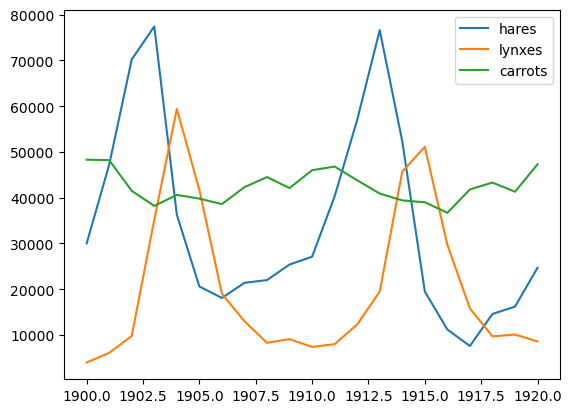

In [83]:

import matplotlib.pyplot as plt
plt.plot(year, hares, label="hares")
plt.plot(year, lynxes, label="lynxes")
plt.plot(year, carrots, label="carrots")
plt.legend()
plt.show()

Compute and print, based on the data in the file:

1. The mean and std of the populations of each species for the years in the period.
2. Which year each species had the largest population.
3. Which species has the largest population for each year.
4. Which years any of the populations is above 50000. 
5. The top 2 years for each species when they had the lowest populations.
6. Compare (plot) the change in hare population (see `np.gradient`) and the number of lynxes. Check correlations (see `np.corrcoef`).

... all without for-loops.

## Mandelbrot (Scipy lectures, 1.4.5.5)

Write a script that computes the Mandelbrot fractal. The Mandelbrot iteration:
```python
N_max = 50
threshold = 50
c = x + 1j*y
z = 0
for j in range(N_max):
    z = z**2 + c
```

A point `(x, y)` belongs to the Mandelbrot set if `|z| < threshold`. 

Compute the Mandelbrot in the following way:
1. Build a grid of `c = x + 1j * y` values in the range `[-2, 1]x[-1.5, 1.5]`.
2. Compute the Mandelbrot iteration.
3. Form the 2d Boolean mask indicating which points are in the set.
4. Display the result with `plt.imshow()`.